<a href="https://colab.research.google.com/github/cristianpichardog/PR2/blob/main/PR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PR2

Jose Enrique Fernandez 22-0330

Cristian Pichardo 20-0535

In [ ]:
# Importando las libreriias que utilizaremos
! pip install pandas
! pip install matplotlib
! pip install folium
! pip install seaborn
! pip install numpy
import pandas as pd
import matplotlib as plt
import seaborn as sns
import folium
import numpy as np
import requests

Importacion  de datos

In [ ]:
# Importando los datos de dataset a usar a una variable llamada df
df = pd.read_csv("tx_deathrow_full.csv")
df.head()

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ\nNumber,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,2018-06-27,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN
2,551,1981-04-03,2003-12-03,10.0,Castillo,Juan Edward,999502,37,2005-09-27,2018-05-16,Hispanic,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...
3,550,1987-04-04,2008-04-06,11.0,Davila,Erick Daniel,999545,31,2009-02-27,2018-04-25,Black,Tarrant,Brown,161.0,"5' 11""",Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ..."
4,549,1980-03-26,2005-09-13,12.0,Rodriguez III,Rosendo,999534,38,2008-05-14,2018-03-27,Hispanic,Lubbock,Brown,198.0,"5' 8""",Wichita,Texas,First I would like to say I have been here sin...


Limpieza de Datos


In [ ]:
# Eliminando columnas que no se utilizaran, como nombre, altura, peso, etc
df.drop(columns = [ "Date of Birth", "Date of Offence", "Last Statement", "Execution Date", "Height", "Weight", "Eye Color", "Date Received","Last Name", "First Name", "Age at Execution", "Execution","Native County"], inplace = True)
df

,Highest Education Level,TDCJ\nNumber,Race,County,Native State
0,9.0,999508,Black,Bexar,Texas
1,12.0,999455,White,Harris,Texas
2,10.0,999502,Hispanic,Bexar,Texas
3,11.0,999545,Black,Tarrant,Texas
4,12.0,999534,Hispanic,Lubbock,Texas
...,...,...,...,...,...
548,NaN,518,White,Lubbock,NaN
549,NaN,621,White,Bell,NaN
550,NaN,529,White,Harris,NaN
551,6.0,670,White,Jefferson,Texas


In [ ]:
# Eliminando filas de la variable Raza que contengan Hispanic
df = df[df["Race"].str.contains("Hispanic") == False]
df

,Highest Education Level,TDCJ\nNumber,Race,County,Native State
0,9.000000,999508,Black,Bexar,Texas
1,12.000000,999455,White,Harris,Texas
3,11.000000,999545,Black,Tarrant,Texas
5,12.000000,999412,White,Dallas,Texas
6,12.000000,999371,Black,Dallas,Texas
...,...,...,...,...,...
548,10.401699,518,White,Lubbock,Texas
549,10.401699,621,White,Bell,Texas
550,10.401699,529,White,Harris,Texas
551,6.000000,670,White,Jefferson,Texas


In [ ]:
# Eliminando filas de la variable Raza que contengan Other
df = df[df["Race"].str.contains("Other") == False]
df

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ\nNumber,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,2018-06-27,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN
2,551,1981-04-03,2003-12-03,10.0,Castillo,Juan Edward,999502,37,2005-09-27,2018-05-16,Hispanic,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...
3,550,1987-04-04,2008-04-06,11.0,Davila,Erick Daniel,999545,31,2009-02-27,2018-04-25,Black,Tarrant,Brown,161.0,"5' 11""",Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ..."
4,549,1980-03-26,2005-09-13,12.0,Rodriguez III,Rosendo,999534,38,2008-05-14,2018-03-27,Hispanic,Lubbock,Brown,198.0,"5' 8""",Wichita,Texas,First I would like to say I have been here sin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,5,1936-04-08,1974-10-23,NaN,Skillern,Doyle,518,49,1975-03-03,1985-01-16,White,Lubbock,NaN,NaN,NaN,NaN,NaN,I pray that my family will rejoice and will fo...
549,4,1945-02-23,1978-08-07,NaN,Barefoot,Thomas,621,39,1978-11-21,1984-10-30,White,Bell,NaN,NaN,NaN,NaN,NaN,"Yes, I do. I hope that one day we can look bac..."
550,3,1944-10-19,NaN,NaN,O'Bryan,Ronald,529,39,1975-07-14,1984-03-31,White,Harris,NaN,NaN,NaN,NaN,NaN,What is about to transpire in a few moments is...
551,2,1954-09-27,1980-04-20,6.0,Autry,James,670,29,1980-10-10,1984-03-14,White,Jefferson,Brown,137.0,"5' 8""",Potter,Texas,NaN


In [ ]:
# Eliminando filas de la variable Raza que contengan Asian
df = df[df["Race"].str.contains("Asian") == False]
df

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ\nNumber,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,2018-06-27,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN
2,551,1981-04-03,2003-12-03,10.0,Castillo,Juan Edward,999502,37,2005-09-27,2018-05-16,Hispanic,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...
3,550,1987-04-04,2008-04-06,11.0,Davila,Erick Daniel,999545,31,2009-02-27,2018-04-25,Black,Tarrant,Brown,161.0,"5' 11""",Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ..."
4,549,1980-03-26,2005-09-13,12.0,Rodriguez III,Rosendo,999534,38,2008-05-14,2018-03-27,Hispanic,Lubbock,Brown,198.0,"5' 8""",Wichita,Texas,First I would like to say I have been here sin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,5,1936-04-08,1974-10-23,NaN,Skillern,Doyle,518,49,1975-03-03,1985-01-16,White,Lubbock,NaN,NaN,NaN,NaN,NaN,I pray that my family will rejoice and will fo...
549,4,1945-02-23,1978-08-07,NaN,Barefoot,Thomas,621,39,1978-11-21,1984-10-30,White,Bell,NaN,NaN,NaN,NaN,NaN,"Yes, I do. I hope that one day we can look bac..."
550,3,1944-10-19,NaN,NaN,O'Bryan,Ronald,529,39,1975-07-14,1984-03-31,White,Harris,NaN,NaN,NaN,NaN,NaN,What is about to transpire in a few moments is...
551,2,1954-09-27,1980-04-20,6.0,Autry,James,670,29,1980-10-10,1984-03-14,White,Jefferson,Brown,137.0,"5' 8""",Potter,Texas,NaN


In [ ]:
df.reset_index(
    drop = True
)

,Execution,Date of Birth,Date of Offence,Highest Education Level,Last Name,First Name,TDCJ\nNumber,Age at Execution,Date Received,Execution Date,Race,County,Eye Color,Weight,Height,Native County,Native State,Last Statement
0,553,1983-09-24,2004-11-21,9.0,Young,Christopher Anthony,999508,34,2006-03-31,2018-07-17,Black,Bexar,Brown,216.0,"6' 1""",Bexar,Texas,l want to make sure the Patel family knows I l...
1,552,1951-08-28,1979-05-27,12.0,Bible,Danny Paul,999455,66,2003-07-17,2018-06-27,White,Harris,Blue,194.0,"5' 7""",Brazoria,Texas,NaN
2,551,1981-04-03,2003-12-03,10.0,Castillo,Juan Edward,999502,37,2005-09-27,2018-05-16,Hispanic,Bexar,Brown,180.0,"5' 11""",Bexar,Texas,To everyone that has been there for me you kno...
3,550,1987-04-04,2008-04-06,11.0,Davila,Erick Daniel,999545,31,2009-02-27,2018-04-25,Black,Tarrant,Brown,161.0,"5' 11""",Tarrant,Texas,"Yes, I would like to say nephew it burns huh. ..."
4,549,1980-03-26,2005-09-13,12.0,Rodriguez III,Rosendo,999534,38,2008-05-14,2018-03-27,Hispanic,Lubbock,Brown,198.0,"5' 8""",Wichita,Texas,First I would like to say I have been here sin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,5,1936-04-08,1974-10-23,NaN,Skillern,Doyle,518,49,1975-03-03,1985-01-16,White,Lubbock,NaN,NaN,NaN,NaN,NaN,I pray that my family will rejoice and will fo...
547,4,1945-02-23,1978-08-07,NaN,Barefoot,Thomas,621,39,1978-11-21,1984-10-30,White,Bell,NaN,NaN,NaN,NaN,NaN,"Yes, I do. I hope that one day we can look bac..."
548,3,1944-10-19,NaN,NaN,O'Bryan,Ronald,529,39,1975-07-14,1984-03-31,White,Harris,NaN,NaN,NaN,NaN,NaN,What is about to transpire in a few moments is...
549,2,1954-09-27,1980-04-20,6.0,Autry,James,670,29,1980-10-10,1984-03-14,White,Jefferson,Brown,137.0,"5' 8""",Potter,Texas,NaN


Informacion del Dataset

In [ ]:
# Devuelve informacion acerca del dataset, como numero de filas y columnas, indice, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 0 to 552
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Highest Education Level  446 non-null    float64
 1   TDCJ
Number              446 non-null    int64  
 2   Race                     446 non-null    object 
 3   County                   446 non-null    object 
 4   Native State             446 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.9+ KB


In [ ]:
# Hacer un conteo de cuantos datos faltantes hay en el dataset para cad columna
datos_faltantes = df.isnull()
print("Filas de datos:",df.shape[0],"\n")

print("Cantidad de valores faltantes")
print("-----------------------------")
for column in datos_faltantes.columns.values.tolist():
    faltantes = datos_faltantes[column].sum()
    if faltantes > 0:
        print(column + ": " + str(faltantes))

Filas de datos: 446 

Cantidad de valores faltantes
-----------------------------


<module 'matplotlib' from '/usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py'>

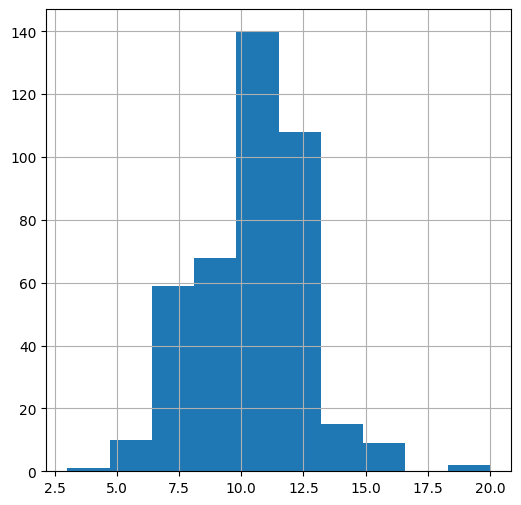

In [ ]:
# Determinando si los valores de Highest Education Level son simetricos o asimetricos.
num_df = df['Highest Education Level'].astype(float)
num_df.hist(figsize = (6, 6))
plt

In [ ]:
# La variable Highest Education Level se muestra simetrica en plt
# Calculando la media de la columna "Highest Education Level"
avg_bore = df["Highest Education Level"].astype(float).mean(axis = 0)

# Reemplazando "NaN" por el valor de la media
df["Highest Education Level"].replace(np.nan, avg_bore, inplace = True)

In [ ]:
# Buscando la moda para la columna Native State y remplazando los datos faltantes por la moda
moda_state = df["Native State"].mode()[0]
df["Native State"].replace(np.nan, moda_state, inplace = True)

In [ ]:
# Revisando que no hay mas datos faltantes en el dataset
datos_faltantes2 = df.isnull()
print("Filas de datos:",df.shape[0],"\n")

print("Cantidad de valores faltantes")
print("-----------------------------")
for column in datos_faltantes2.columns.values.tolist():
    faltantes = datos_faltantes2[column].sum()
    if faltantes > 0:
        print(column + ": " + str(faltantes))

Filas de datos: 446 

Cantidad de valores faltantes
-----------------------------


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 0 to 552
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Highest Education Level  446 non-null    float64
 1   TDCJ
Number              446 non-null    int64  
 2   Race                     446 non-null    object 
 3   County                   446 non-null    object 
 4   Native State             446 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.9+ KB


In [ ]:
df.describe(include = "all")

,Highest Education Level,TDCJ\nNumber,Race,County,Native State
count,446.000000,446.000000,446,446,446
unique,NaN,NaN,2,89,43
top,NaN,NaN,White,Harris,Texas
freq,NaN,NaN,245,112,290
mean,10.401699,500013.356502,NaN,NaN,NaN
std,2.007161,499786.378810,NaN,NaN,NaN
min,3.000000,511.000000,NaN,NaN,NaN
25%,9.000000,798.250000,NaN,NaN,NaN
50%,10.401699,499999.500000,NaN,NaN,NaN
75%,12.000000,999226.250000,NaN,NaN,NaN


In [ ]:
df.dtypes


Highest Education Level    float64
TDCJ\nNumber                 int64
Race                        object
County                      object
Native State                object
dtype: object

In [ ]:
cantidad_race = df["Race"].value_counts()
cantidad_race

White    245
Black    201
Name: Race, dtype: int64

In [ ]:
cantidad_educacion = df["Highest Education Level"].value_counts()
cantidad_educacion

12.000000    100
10.000000     71
11.000000     69
9.000000      68
8.000000      39
10.401699     34
7.000000      20
14.000000     15
6.000000       8
13.000000      7
15.000000      5
16.000000      4
5.000000       2
12.500000      1
3.000000       1
19.000000      1
20.000000      1
Name: Highest Education Level, dtype: int64

In [ ]:
cantidad_state = df["Native State"].value_counts()
cantidad_state

Texas             290
California         18
Louisiana          14
Oklahoma           12
New York            8
Ohio                8
Arkansas            7
Illinois            7
Missouri            7
Georgia             6
Michigan            6
Kentucky            5
Florida             4
Virginia            4
New Mexico          4
Alabama             4
Mississippi         3
Indiana             3
Colorado            3
Wisconsin           3
Germany             3
Tennessee           3
South Carolina      2
North Carolina      2
Washington          2
New Jersey          1
Oregon              1
Vermont             1
West Germany        1
Arizona             1
Philippines         1
Kansas              1
Maryland            1
Minnesota           1
West Virginia       1
Canada              1
Nebraska            1
Utah                1
Netherlands         1
South Dakota        1
France              1
Rhode Island        1
Pennsylvania        1
Name: Native State, dtype: int64

In [ ]:
cantidad_county = df["County"].value_counts()
cantidad_county

Harris         112
Dallas          47
Tarrant         36
Bexar           22
Montgomery      15
              ... 
Gillespie        1
Coryell          1
San Jacinto      1
Jones            1
Hardin           1
Name: County, Length: 89, dtype: int64

In [ ]:
promedio_race_state = df.reset_index().pivot_table(index = "County", columns = "Race")
promedio_race_state

<ipython-input-43-fd46b59a1dfa>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  promedio_race_state = df.reset_index().pivot_table(index = "County", columns = "Race")


Highest Education Level       TDCJ\nNumber            index       
Race                         Black White        Black     White  Black  White
County                                                                       
Anderson                  10.70085  11.0     999217.5  499997.0  169.5  273.0
Aransas                   11.00000   NaN        898.0       NaN  423.0    NaN
Atascosa                       NaN   9.0          NaN  999209.0    NaN  214.0
Bastrop                   12.00000   NaN     999091.0       NaN  335.0    NaN
Bee                            NaN   8.0          NaN  999411.0    NaN    9.0
...                            ...   ...          ...       ...    ...    ...
Wharton                        NaN  12.0          NaN  999539.0    NaN   20.0
Wichita                        NaN   9.5          NaN  999130.5    NaN  292.0
Wilbarger                      NaN  17.0          NaN  499851.5    NaN  355.0
Williamson                14.00000   NaN        821.0       NaN  341.0    NaN
Wood                      10.00000   NaN        851.0       NaN  115.0    NaN

[89 rows x 6 columns]

<Axes: xlabel='Highest Education Level'>

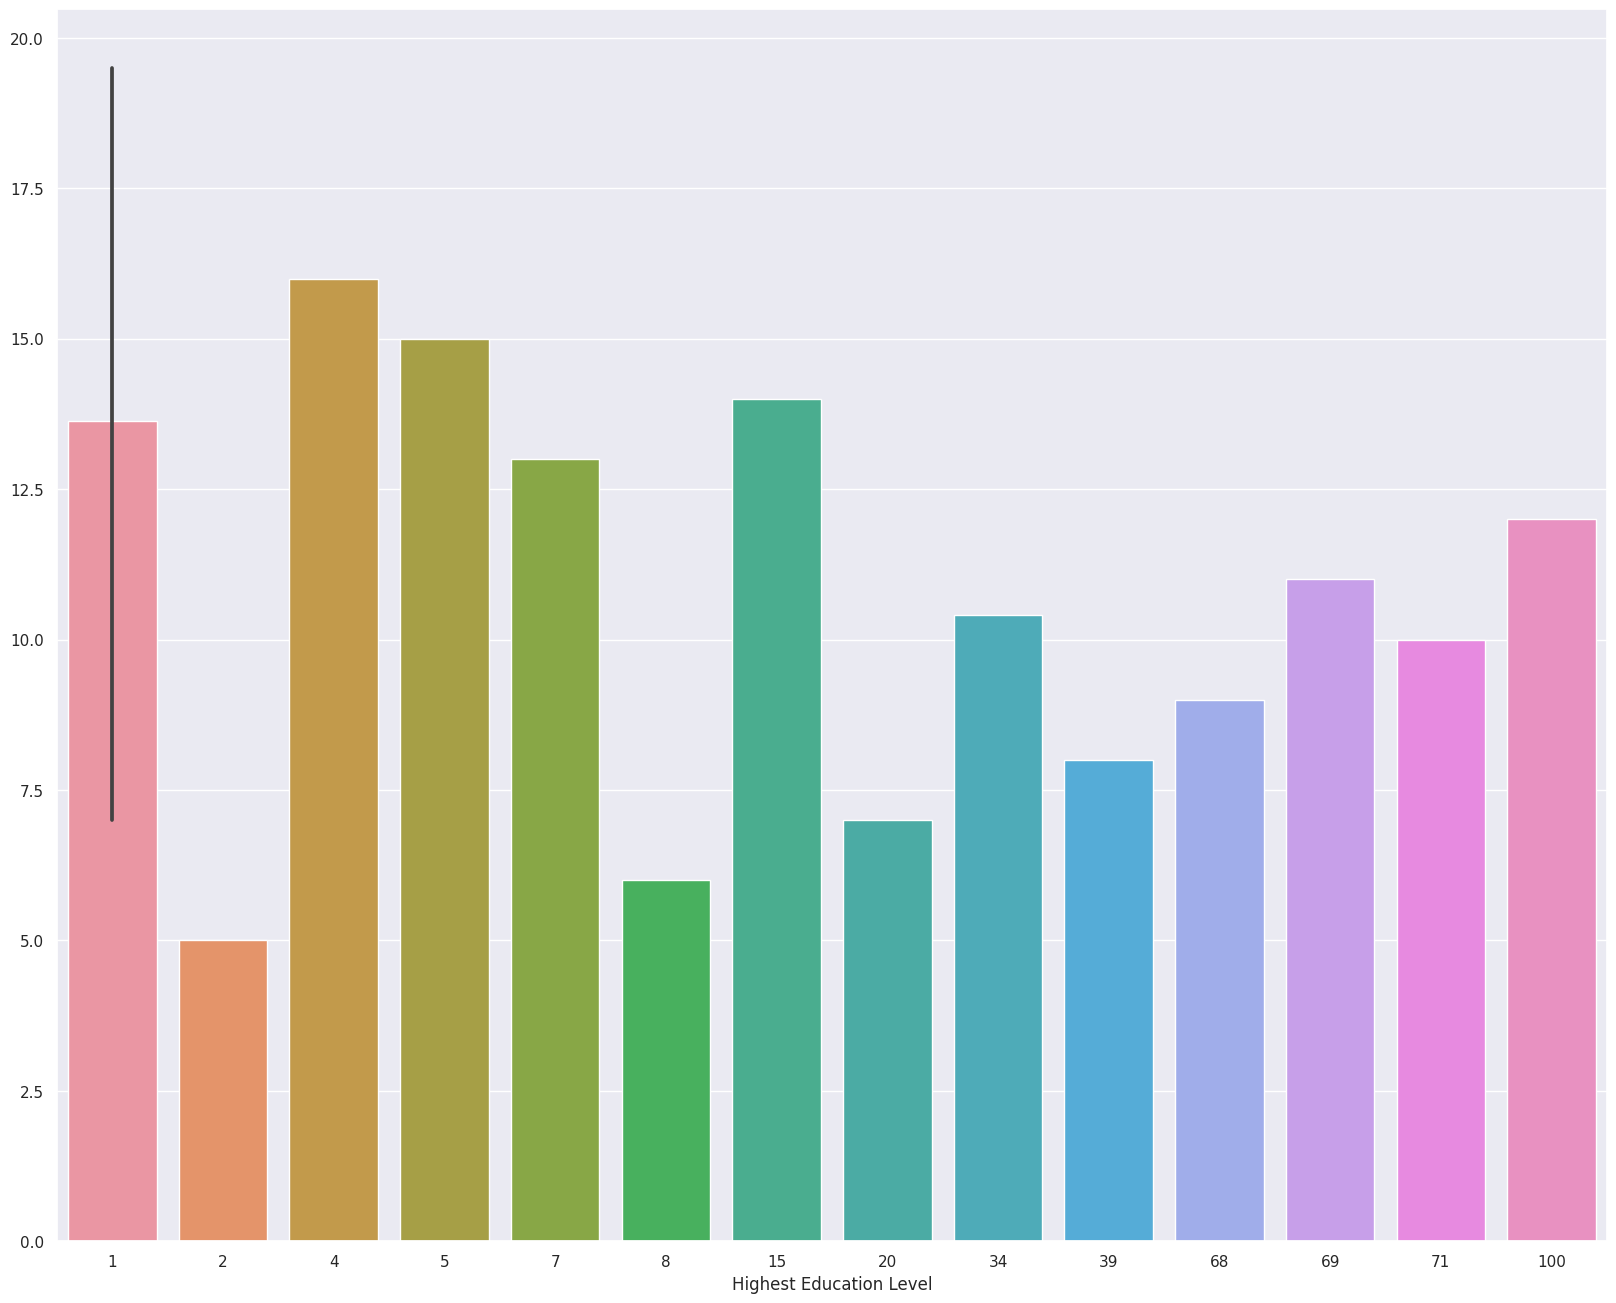

In [ ]:
sns.set(rc={'figure.figsize':(20,16)})
sns.barplot(y = cantidad_educacion.index, x = cantidad_educacion)

<Axes: >

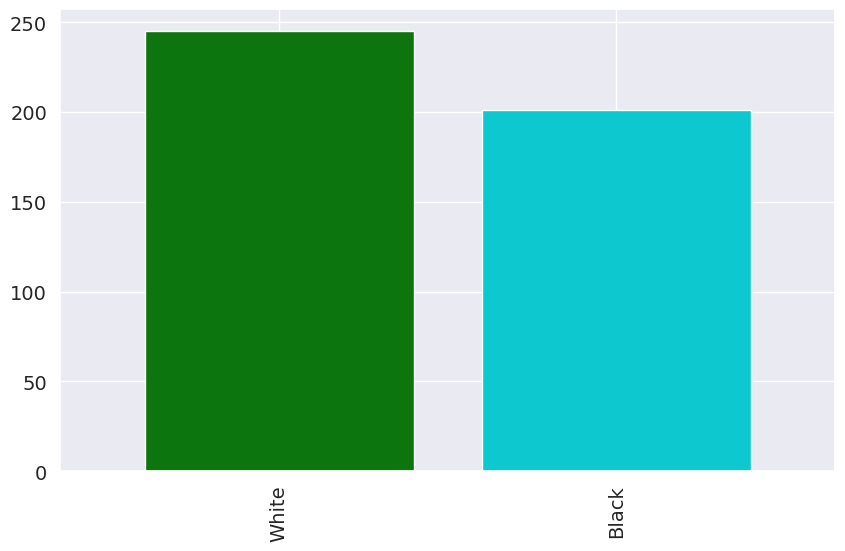

In [ ]:
cantidad_race.plot(kind = "bar",
                           figsize = (10,6),
                           width = 0.8,
                           color = ["#0d750d", "#0ec8cf", "#e36671"],
                      fontsize = 14
)

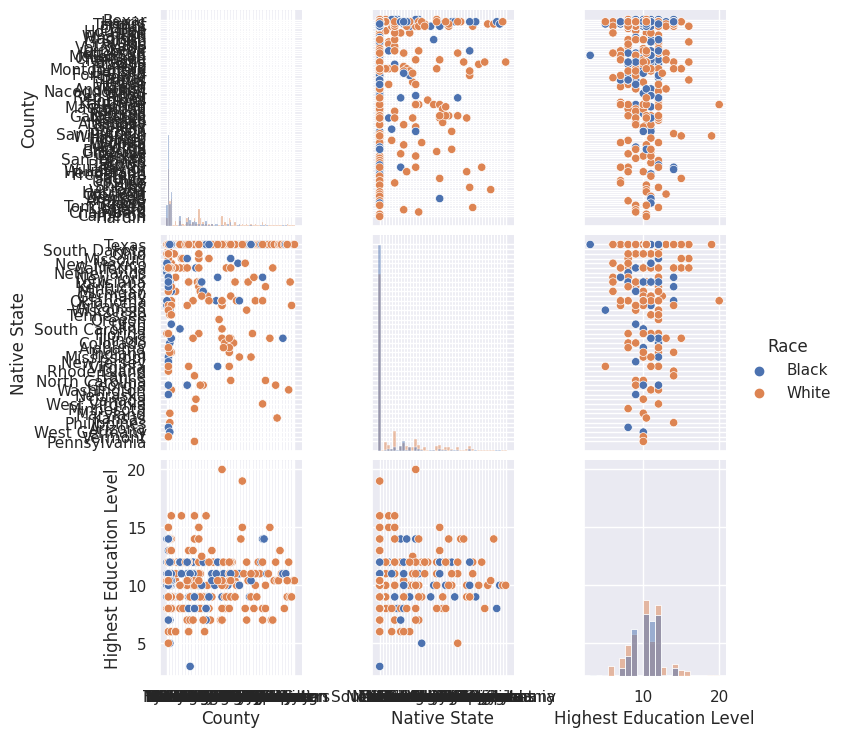

In [ ]:
sns.pairplot(data = df, vars = [ "County", "Native State", "Highest Education Level"], hue = "Race", diag_kind = "hist")


In [ ]:
# Codificando las variables
race_dummy = pd.get_dummies(df['Race'], prefix='Race', drop_first = True)
df = pd.concat([df, race_dummy], axis=1).drop(columns = ['Race'])

In [ ]:
county_dummy = pd.get_dummies(df['County'], prefix='County', drop_first = True)
df = pd.concat([df, county_dummy], axis=1).drop(columns = ['County'])

In [ ]:
state_dummy = pd.get_dummies(df['Native State'], prefix='Native State', drop_first = True)
df = pd.concat([df, state_dummy], axis=1).drop(columns = ['Native State'])

In [ ]:
df

,Highest Education Level,TDCJ\nNumber,Race_White,County_Aransas,County_Atascosa,County_Bastrop,County_Bee,County_Bell,County_Bexar,County_Bowie,...,Native State_South Dakota,Native State_Tennessee,Native State_Texas,Native State_Utah,Native State_Vermont,Native State_Virginia,Native State_Washington,Native State_West Germany,Native State_West Virginia,Native State_Wisconsin
0,9.000000,999508,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,12.000000,999455,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,11.000000,999545,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,12.000000,999412,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,12.000000,999371,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,10.401699,518,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
549,10.401699,621,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
550,10.401699,529,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
551,6.000000,670,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Separando las variables
objetivo = df["Race_White"]
caracteristicas = df.drop(columns = ["Race_White"])

In [ ]:
! pip install sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, objetivo, test_size = .3, random_state = 0)

In [ ]:
# Creando el modelo
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(tol=0.000001, max_iter=200)

# Entrenando el modelo
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, tol=1e-06)

In [ ]:
y_eval = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_eval)
score

0.40298507462686567

In [ ]:
# Creando el modelo
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)

# Entrenando el modelo
tree.fit(X_train, y_train)

# Evaluando
y_eval = tree.predict(X_test)
score = accuracy_score(y_test, y_eval)
score

0.582089552238806

In [ ]:
# Creando el modelo
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(random_state = 0)

# Entrenando el modelo
tree.fit(X_train, y_train)

# Evaluando
y_eval = tree.predict(X_test)
score = accuracy_score(y_test, y_eval)
score

0.6492537313432836